# Manish Sidhenkiwar
LinkedIn: https://www.linkedin.com/in/msid02/
# Text Classification

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/


In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

In [3]:
#df = pd.read_csv('../DATA/moviereviews.csv')
df=pd.read_csv("/content/gdrive/MyDrive/UdemyNotebooks/2.1 ML Backup(6Jan'22)/DATA/moviereviews.csv")

In [4]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**TASK: Check to see if there are any missing values in the dataframe.**

In [5]:
#CODE HERE
df.isnull().sum()

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

label     0
review    0
dtype: int64

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [hint]
(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [8]:
#Series.str.isspace()[source]

In [9]:
s="   "

In [10]:
#Python built in method to check for spaces.
s.isspace()

True

In [11]:
s=""     #NO space

In [12]:
s.isspace()

False

In [13]:
# Lets apply Series.str.isspace() to our df text column.(Use str.isspace as we are applying it to text data)
df['review'].str.isspace()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: review, Length: 1965, dtype: bool

In [14]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [15]:
# to get total count of empty space,use 
df[df['review'].str.isspace()].count()

label     27
review    27
dtype: int64

## As you can see above,review table is completely blank as there's no text .
## Lets use pandas to get inverse of above empty spaces in strings.
## We can do this by assigning ~ to our dataframe.

In [16]:
df[~df['review'].str.isspace()]

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [17]:
df= df[~df['review'].str.isspace()]

In [18]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


### As .isspace() don't check for empty strings like "",'' etc,
### Lets do simple apply method to check for that.

In [19]:
df['review'].apply(lambda review: review=='')

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: review, Length: 1938, dtype: bool

In [20]:
df[df['review'].apply(lambda review: review=='')]

,label,review


## It seems we don't have any empty strings,that's good.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**TASK: Confirm the value counts per label:**

In [22]:
#CODE HERE
df['label'].value_counts()

pos    969
neg    969
Name: label, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type?
[hint]
(https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
#We don't want englist stop words so remove it.
count_vect = CountVectorizer(stop_words='english')

In [25]:
# documents are just review texts we got in our dataframe.

In [26]:
#Lets set for words per label type(pos,neg)
matrix = count_vect.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(count_vect.get_feature_names(), matrix.sum(axis=0).tolist()[0])

# sort from largest to smallest 20 words.
print(sorted(freqs, key=lambda x: -x[1])[:20])


[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
# for pos label type
matrix = count_vect.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(count_vect.get_feature_names(), matrix.sum(axis=0).tolist()[0])

# sort from largest to smallest 20 words.
print(sorted(freqs, key=lambda x: -x[1])[:20])


[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split.**

In [28]:
X=df['review']
y= df['label']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
# Lets import model
from sklearn.svm import LinearSVC

In [34]:
pipe= Pipeline([('tfidf',TfidfVectorizer()),
               ('svc',LinearSVC())])

In [35]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [36]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [37]:
preds= pipe.predict(X_test)

In [38]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


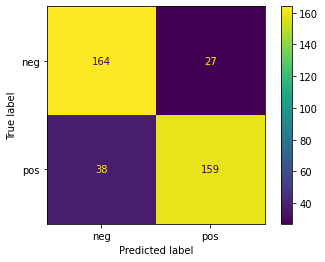

In [39]:
plot_confusion_matrix(pipe,X_test,y_test)

## Our model is performing pretty well with 83  pc accuracy.

## Thanks!

---
---